In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob

In [2]:
bank_data = glob.glob("*.csv")
bank_data

['bank-full.csv', 'bank.csv']

In [3]:
bank_full_df = pd.read_csv(bank_data[0], delimiter=";")
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Remapping the feature values into 0 and 1
bank_full_df['y']=bank_full_df['y'].map({'yes':1,'no':0})
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


<Figure size 2880x1440 with 0 Axes>

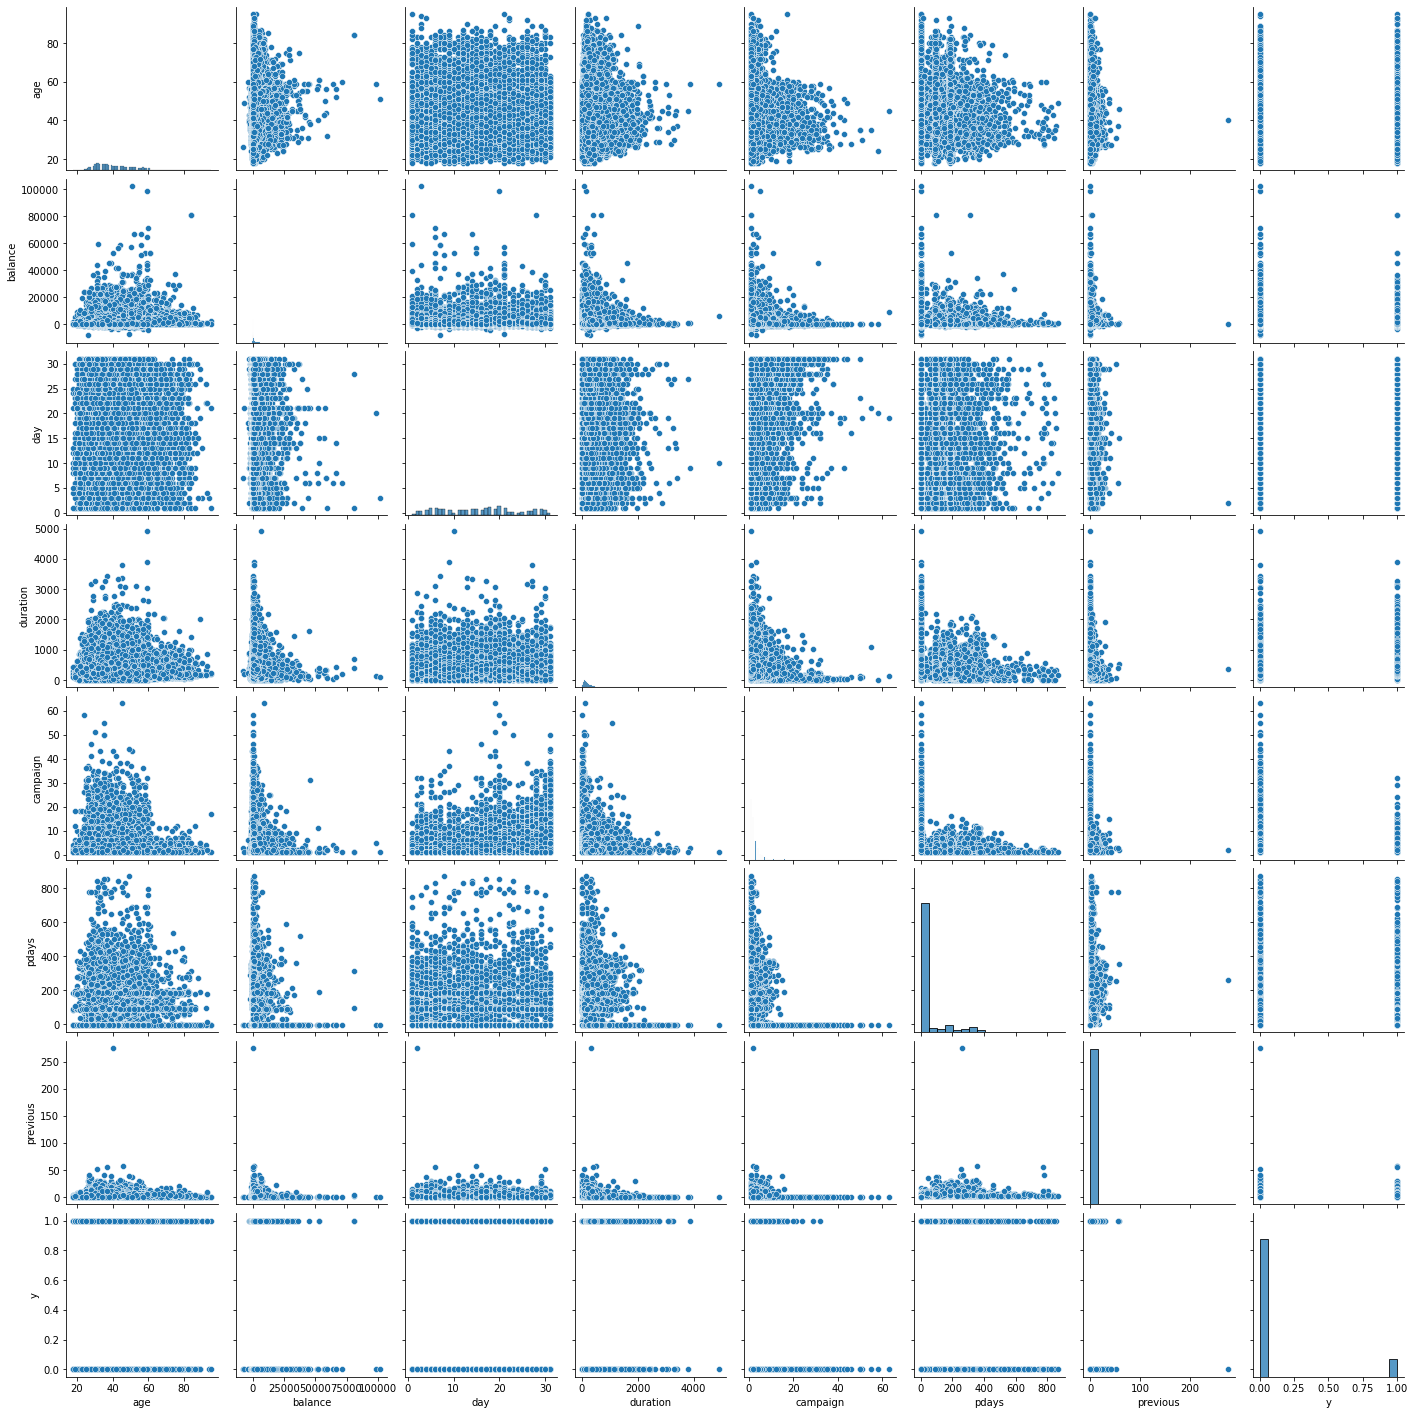

<Figure size 2880x1440 with 0 Axes>

In [5]:
# Making a pairplot to see the featuers relation
sns.pairplot(bank_full_df)
plt.figure(figsize=(40,20))

In [6]:
# Counting the total of 0 and 1 for the target feature
bank_full_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

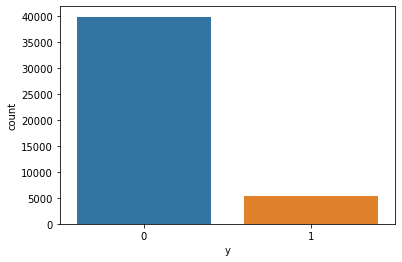

In [7]:
# Plotting a graph for the 0 and 1 ratio from the target feature
sns.countplot(x='y',data=bank_full_df)

In [8]:
# Checking for any null values in the dataframe
bank_full_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import category_encoders as ce

In [10]:
# Transforming the predictors categorical values into numerical
column_trans = ce.OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [11]:
# Creating a new df with just the predictors
bank_full_X = bank_full_df.drop(columns={'y'})
bank_full_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [12]:
# dataframe with just the response
bank_full_y=bank_full_df['y']
bank_full_y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the dataset into training and test set
bank_X_train, bank_X_test, bank_y_train, bank_y_test=train_test_split(bank_full_X,bank_full_y,
                                                                     test_size=0.3, random_state=34)

In [15]:
bank_X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
16107,51,management,divorced,tertiary,no,0,no,yes,cellular,22,jul,176,4,-1,0,unknown
18756,33,blue-collar,married,primary,no,2064,yes,no,cellular,31,jul,18,15,-1,0,unknown
23295,52,technician,married,secondary,no,470,no,no,cellular,27,aug,60,8,-1,0,unknown
20822,45,technician,married,secondary,no,144,no,no,cellular,13,aug,299,4,-1,0,unknown
13812,35,admin.,married,secondary,no,-428,yes,yes,cellular,10,jul,147,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28406,28,technician,single,tertiary,no,959,yes,no,cellular,29,jan,330,2,-1,0,unknown
22377,44,technician,married,secondary,no,267,no,no,cellular,22,aug,520,2,-1,0,unknown
43498,22,student,single,primary,no,3472,no,no,cellular,19,apr,529,1,181,4,success
38010,35,technician,married,secondary,no,650,yes,no,cellular,14,may,241,2,349,2,failure


In [16]:
bank_y_train

16107    0
18756    0
23295    0
20822    0
13812    0
        ..
28406    0
22377    1
43498    1
38010    0
11681    0
Name: y, Length: 31647, dtype: int64

In [17]:
# Transforming categorical data into numerical
bank_X_train = column_trans.fit_transform(bank_X_train)
bank_X_train

D:\Users\Bao Doan\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
16107,51,1,0,0,0,0,0,0,0,0,...,0,0,176,4,-1,0,1,0,0,0
18756,33,0,1,0,0,0,0,0,0,0,...,0,0,18,15,-1,0,1,0,0,0
23295,52,0,0,1,0,0,0,0,0,0,...,0,0,60,8,-1,0,1,0,0,0
20822,45,0,0,1,0,0,0,0,0,0,...,0,0,299,4,-1,0,1,0,0,0
13812,35,0,0,0,1,0,0,0,0,0,...,0,0,147,1,-1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28406,28,0,0,1,0,0,0,0,0,0,...,0,0,330,2,-1,0,1,0,0,0
22377,44,0,0,1,0,0,0,0,0,0,...,0,0,520,2,-1,0,1,0,0,0
43498,22,0,0,0,0,0,0,0,0,1,...,0,0,529,1,181,4,0,0,1,0
38010,35,0,0,1,0,0,0,0,0,0,...,0,0,241,2,349,2,0,1,0,0


In [18]:
bank_X_test = column_trans.transform(bank_X_test)
bank_X_test

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
16577,59,0,0,0,0,1,0,0,0,0,...,0,0,129,1,-1,0,1,0,0,0
27306,36,1,0,0,0,0,0,0,0,0,...,0,0,137,1,-1,0,1,0,0,0
30023,52,0,0,0,0,0,0,0,0,0,...,0,0,131,2,-1,0,1,0,0,0
21056,54,0,0,0,0,0,0,1,0,0,...,0,0,183,6,-1,0,1,0,0,0
28377,31,1,0,0,0,0,0,0,0,0,...,0,0,266,1,-1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33912,25,1,0,0,0,0,0,0,0,0,...,0,0,512,1,-1,0,1,0,0,0
39850,32,0,0,0,1,0,0,0,0,0,...,0,0,154,1,194,3,0,1,0,0
30684,27,0,0,0,0,0,1,0,0,0,...,0,0,145,1,-1,0,1,0,0,0
6024,32,0,0,1,0,0,0,0,0,0,...,0,0,125,3,-1,0,1,0,0,0


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score

In [20]:
# Performing a range of tree deph to evaluate which tree deph is the the most optimal and prefer choice.
# List of depths range
depth_range=list(range(1,11))

# Accuracy score of training and test data
train_accuracy=[]
test_accuracy=[]

# Classification Error of training and test data
train_error = []
test_error = []

for depth in depth_range:
    # The only change in the parameter is the setting up of random_state in order to secure replicability
    # Apart from random_state, there are no changes in other parameters, everything stays default
    clf = DecisionTreeClassifier(random_state = 51, max_depth = depth)
    clf.fit(bank_X_train,bank_y_train)
    y_pred = clf.predict(bank_X_test)
    
    # performing accuracy score on both the test and training set
    train_accu = accuracy_score(bank_y_train, clf.predict(bank_X_train))
    test_accu = accuracy_score(bank_y_test, y_pred)
    
    train_accuracy.append(train_accu)
    test_accuracy.append(test_accu)
    
    error_train = 1-train_accu
    error_test = 1-test_accu
    
    train_error.append(error_train)
    test_error.append(error_test)
    

In [21]:
train_accuracy

[0.8816001516731444,
 0.8940815875122444,
 0.9001485132871995,
 0.9008752804373242,
 0.9028027933137422,
 0.9067526147818119,
 0.9110500205390716,
 0.916232186305179,
 0.9224571049388568,
 0.9290612064334692]

In [22]:
# Creating new dataframe contains the deph range along with its accuracy score and its error score
tree_error = pd.DataFrame()
tree_error['Tree_Depth'] = depth_range
tree_error['training_error'] = train_error
tree_error['test_error']= test_error
tree_error

,Tree_Depth,training_error,test_error
0,1,0.118400,0.113683
1,2,0.105918,0.099676
2,3,0.099851,0.096137
3,4,0.099125,0.095916
4,5,0.097197,0.095326
5,6,0.093247,0.095989
6,7,0.088950,0.096874
7,8,0.083768,0.098054
8,9,0.077543,0.097759
9,10,0.070939,0.099381


In [23]:
# Melting the dataframe and rearranging the features into more readable format to perform some graph.
Tree_error = pd.melt(tree_error, id_vars=['Tree_Depth'], value_vars=['training_error','test_error'], var_name='Errors',value_name = 'Error Value')
Tree_error

,Tree_Depth,Errors,Error Value
0,1,training_error,0.118400
1,2,training_error,0.105918
2,3,training_error,0.099851
3,4,training_error,0.099125
4,5,training_error,0.097197
5,6,training_error,0.093247
6,7,training_error,0.088950
7,8,training_error,0.083768
8,9,training_error,0.077543
9,10,training_error,0.070939


<Figure size 1440x1152 with 0 Axes>

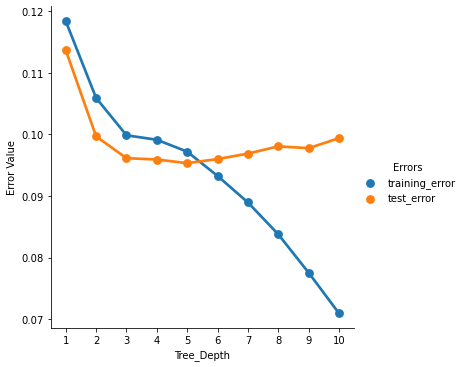

<Figure size 1440x1152 with 0 Axes>

In [24]:
e_plot = sns.catplot(x='Tree_Depth', y='Error Value',hue='Errors',data=Tree_error,kind='point')  # Visualising the training and test errors
plt.figure(figsize=(20,16))

Since tree depth of 5 marks the beginning of rising in error scores, and where the training and test error scores meet. This depth can be considered the preferable deph for this particular data.

In [25]:
# As performed earlier the prefer depth is 5, the only changes is the random state for replicability, other parameters stay default.
# Making a decision tree classifier model and fir the training data
bank_clf_5 = DecisionTreeClassifier(random_state=51, max_depth=5)
bank_clf_5 = bank_clf_5.fit(bank_X_train, bank_y_train)

In [26]:
# Using the training model to predict the test dataset
bank_y_pred=bank_clf_5.predict(bank_X_test)
bank_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
bank_conf2 = pd.DataFrame(bank_y_pred, columns=['Result'])
bank_conf2

,Result
0,0
1,0
2,0
3,0
4,0
...,...
13559,1
13560,0
13561,0
13562,0


In [29]:
# Count the total of 0 and 1 from the prediction
bank_conf2.value_counts()

Result
0         12655
1           909
dtype: int64

In [30]:
bank_y_test.value_counts()

0    12022
1     1542
Name: y, dtype: int64

In [31]:
# Performing predict proba for the 0 and 1 probability for clients
bank_test_proba = bank_clf_5.predict_proba(bank_X_test, check_input=True)
bank_test_proba

array([[0.97784604, 0.02215396],
       [0.97784604, 0.02215396],
       [0.97784604, 0.02215396],
       ...,
       [0.97784604, 0.02215396],
       [0.97784604, 0.02215396],
       [0.97784604, 0.02215396]])

In [32]:
# Removing the column for 0 and only have the 1 remains
bank_test_score = bank_test_proba[:,1]  
bank_test_score

array([0.02215396, 0.02215396, 0.02215396, ..., 0.02215396, 0.02215396,
       0.02215396])

In [33]:
thresholds=np.linspace(0,1,11)  #set of numbers using to test the threshold
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [34]:
# Checking precision scores and recall scores for a range of thresholds to evaluate the most optimal thresholds
precision_scores=[]
recall_scores=[]

    
for prob in thresholds:
    #Sorting out thresholds values
    bank_test_pred = []
    
    for proba in bank_test_score:
        if proba>prob:
            bank_test_pred.append(1) #If the proba is greater than the threshold outline, it will be represent as 1
        else:
            bank_test_pred.append(0) #If the proba is less than the threshold outlined, it will be represent as 0
    
    precision = precision_score(bank_y_test, bank_test_pred,zero_division=1) #Precision score for the threshold
    recall=recall_score(bank_y_test,bank_test_pred) #Recall score for the threshold
    
    precision_scores.append(precision) #Append the score to the empty created list
    recall_scores.append(recall) #Append the score to the empty created list

In [35]:
precision_scores

[0.11343856025962532,
 0.3314151190164792,
 0.4975206611570248,
 0.5203703703703704,
 0.5845771144278606,
 0.636963696369637,
 0.6845124282982792,
 0.7385159010600707,
 0.7419354838709677,
 0.7419354838709677,
 1.0]

In [36]:
# Grouping the thresholds, precision and recall to compare
bank_thresholds = pd.DataFrame()
bank_thresholds['Thresholds'] = thresholds
bank_thresholds['Precision'] = precision_scores
bank_thresholds['Recall'] = recall_scores
bank_thresholds

,Thresholds,Precision,Recall
0,0.0,0.113439,0.997406
1,0.1,0.331415,0.821660
2,0.2,0.497521,0.585603
3,0.3,0.520370,0.546693
4,0.4,0.584577,0.457198
5,0.5,0.636964,0.375486
6,0.6,0.684512,0.232166
7,0.7,0.738516,0.135538
8,0.8,0.741935,0.014916
9,0.9,0.741935,0.014916


In [37]:
from sklearn.metrics import plot_precision_recall_curve

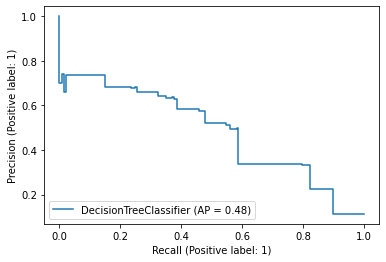

In [38]:
disp = plot_precision_recall_curve(bank_clf_5, bank_X_test, bank_y_test)

In [39]:
# Grouping the target test variable and the predict probability scores
test_scores = pd.DataFrame()
test_scores['target_variable']=bank_y_test
test_scores['score']=bank_test_score
test_scores.reset_index(drop=True, inplace=True)
test_scores

,target_variable,score
0,0,0.022154
1,0,0.022154
2,0,0.022154
3,0,0.022154
4,0,0.178740
...,...,...
13559,1,0.536797
13560,0,0.022154
13561,0,0.022154
13562,0,0.022154


In [41]:
# Creating a bins range
bins=np.linspace(0,1,11)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [62]:
# Making a df for bins scale
bins_scale=pd.DataFrame()
bins_scale['score']=bins
bins_scale['values']=list(range(0,11))
bins_scale

,score,values
0,0.0,0
1,0.1,1
2,0.2,2
3,0.3,3
4,0.4,4
5,0.5,5
6,0.6,6
7,0.7,7
8,0.8,8
9,0.9,9


In [42]:
# Making a bins score dataframe with the predict scores and its predicted values along with the target values for comparison
test_scores['bins']=pd.cut(test_scores['score'],bins,labels=list(range(0,10)),include_lowest=True)
test_scores

,target_variable,score,bins
0,0,0.022154,0
1,0,0.022154,0
2,0,0.022154,0
3,0,0.022154,0
4,0,0.178740,1
...,...,...,...
13559,1,0.536797,5
13560,0,0.022154,0
13561,0,0.022154,0
13562,0,0.022154,0


In [86]:
goal_ROI = pd.DataFrame()
goal_ROI['Total Count'] = test_scores[::-1].groupby('bins')['target_variable'].count() #Count how many data are in each bins
goal_ROI['Cumu. Total Count'] = goal_ROI.loc[::-1,'Total Count'].cumsum()[::-1] # Cumulative sum of total count
goal_ROI['Confirmed'] = test_scores.groupby('bins')['target_variable'].sum() # Sum of values for count of 1
goal_ROI['Cumu. Confirmed'] = goal_ROI.loc[::-1,'Confirmed'].cumsum()[::-1] # Cumulative sum of confirmed
goal_ROI['Cost'] = goal_ROI['Total Count'] * 1 #The Cost of the data
goal_ROI['Cumu. Cost'] = goal_ROI['Cumu. Total Count'] * 1
goal_ROI['Profit'] = goal_ROI['Confirmed'] * 50 # Calculation for profit
goal_ROI['Cumu. Profit'] = goal_ROI['Cumu. Confirmed'] * 50
goal_ROI['ROI'] = goal_ROI['Profit'] - goal_ROI['Cost']
goal_ROI.sort_index(ascending=False)

,Total Count,Cumu. Total Count,Confirmed,Cumu. Confirmed,Cost,Cumu. Cost,Profit,Cumu. Profit,ROI
bins,,,,,,,,,
9,31,31,23,23,31,31,1150,1150,1119
8,0,31,0,23,0,31,0,1150,0
7,252,283,186,209,252,283,9300,10450,9048
6,240,523,149,358,240,523,7450,17900,7210
5,386,909,221,579,386,909,11050,28950,10664
4,297,1206,126,705,297,1206,6300,35250,6003
3,414,1620,138,843,414,1620,6900,42150,6486
2,195,1815,60,903,195,1815,3000,45150,2805
1,2008,3823,364,1267,2008,3823,18200,63350,16192
